In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#!pip install scikit-multilearn

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [ ]:
df = pd.read_csv("TRAIN.csv")

In [ ]:
df.isnull().sum()

TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              1
Quantitative Biology    1
Quantitative Finance    1
labels                  1
dtype: int64

In [ ]:
df = df.replace('np.nan', 0)

In [ ]:
# Replace using median 
median = df['Statistics'].median()
df['Statistics'].fillna(median, inplace=True)

In [ ]:
median = df['Quantitative Biology'].median()
df['Quantitative Biology'].fillna(median, inplace=True)

In [ ]:
median = df['Quantitative Finance'].median()
df['Quantitative Finance'].fillna(median, inplace=True)

In [ ]:
print (df['Quantitative Finance'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
1897    False
1898    False
1899    False
1900    False
1901    False
Name: Quantitative Finance, Length: 1902, dtype: bool


In [ ]:
df.isnull().sum()

TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
labels                  1
dtype: int64

In [ ]:
df.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,labels
0,ChemGAN challenge for drug discovery: can AI r...,Generating molecules with desired chemical p...,1,0,0,1.0,0.0,0.0,"Computer Science,Statistics"
1,Hybrid graphene tunneling photoconductor with ...,Hybrid graphene photoconductor/phototransist...,0,1,0,0.0,0.0,0.0,Physics
2,Temperature Dependence of Magnetic Excitations...,When an ordered spin system of a given dimen...,0,1,0,0.0,0.0,0.0,Physics
3,A Las Vegas algorithm to solve the elliptic cu...,"In this paper, we describe a new Las Vegas a...",1,0,1,0.0,0.0,0.0,"Computer Science,Mathematics"
4,Comparing simulations and test data of a radia...,The VIS instrument on board the Euclid missi...,0,1,0,0.0,0.0,0.0,Physics


In [ ]:
df.loc[0].TITLE

'ChemGAN challenge for drug discovery: can AI reproduce natural chemical diversity?'

In [ ]:
df.dtypes

TITLE                    object
ABSTRACT                 object
Computer Science          int64
Physics                   int64
Mathematics               int64
Statistics              float64
Quantitative Biology    float64
Quantitative Finance    float64
labels                   object
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


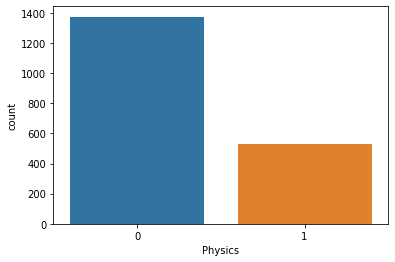

In [ ]:
sns.countplot(df['Physics'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


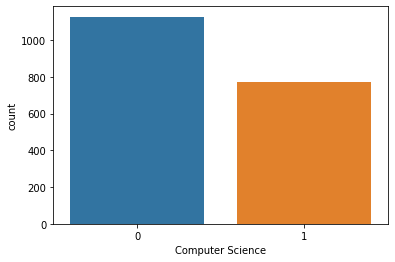

In [ ]:
sns.countplot(df['Computer Science'])

In [ ]:
df['Computer Science'].value_counts()

0    1128
1     774
Name: Computer Science, dtype: int64

In [ ]:
!pip install neattext

In [ ]:
import neattext as nt
import neattext.functions as nfx

In [ ]:
df['TITLE'].apply(lambda x:nt.TextFrame(x).noise_scan())

0       {'text_noise': 4.878048780487805, 'text_length...
1       {'text_noise': 2.586206896551724, 'text_length...
2       {'text_noise': 4.301075268817205, 'text_length...
3       {'text_noise': 3.9473684210526314, 'text_lengt...
4       {'text_noise': 5.88235294117647, 'text_length'...
                              ...                        
1897    {'text_noise': 3.076923076923077, 'text_length...
1898    {'text_noise': 2.941176470588235, 'text_length...
1899    {'text_noise': 3.3333333333333335, 'text_lengt...
1900    {'text_noise': 5.47945205479452, 'text_length'...
1901    {'text_noise': 4.25531914893617, 'text_length'...
Name: TITLE, Length: 1902, dtype: object

In [ ]:
df['TITLE'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                   [for, can]
1         [with, towards, and]
2             [of, above, the]
3                 [a, to, the]
4       [and, of, a, for, the]
                 ...          
1897                 [of, for]
1898                  [of, in]
1899                  [of, in]
1900               [of, a, at]
1901                 [of, for]
Name: TITLE, Length: 1902, dtype: object

In [ ]:
dir(nfx)

['CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_numbers',
 'extract_pattern',
 'extract_phone_numbers',
 'extract_special_characters',
 'extract_stopwords',
 'extract_urls',
 'extract_userhandles',
 'fix_contractions',
 'generate_sentence',
 'hamming_dista

In [ ]:
df['TITLE'].apply(nfx.remove_stopwords)

0       ChemGAN challenge drug discovery: AI reproduce...
1       Hybrid graphene tunneling photoconductor inter...
2       Temperature Dependence Magnetic Excitations: T...
3       Las Vegas algorithm solve elliptic curve discr...
4       Comparing simulations test data radiation dama...
                              ...                        
1897    Ensemble Neural Classifiers Scoring Knowledge ...
1898    Fast Characterization Segmental Duplications G...
1899    ALMA Observations Starless Core Substructure O...
1900    ISM properties Massive Dusty Star-Forming Gala...
1901             Fréchet Analysis Variance Random Objects
Name: TITLE, Length: 1902, dtype: object

In [ ]:
corpus = df['TITLE'].apply(nfx.remove_stopwords)

In [ ]:
############################## FEATURE ENGINEERING ##################################

In [ ]:

tfidf = TfidfVectorizer()

In [ ]:
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [ ]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,labels
0,ChemGAN challenge for drug discovery: can AI r...,Generating molecules with desired chemical p...,1,0,0,1.0,0.0,0.0,"Computer Science,Statistics"
1,Hybrid graphene tunneling photoconductor with ...,Hybrid graphene photoconductor/phototransist...,0,1,0,0.0,0.0,0.0,Physics
2,Temperature Dependence of Magnetic Excitations...,When an ordered spin system of a given dimen...,0,1,0,0.0,0.0,0.0,Physics
3,A Las Vegas algorithm to solve the elliptic cu...,"In this paper, we describe a new Las Vegas a...",1,0,1,0.0,0.0,0.0,"Computer Science,Mathematics"
4,Comparing simulations and test data of a radia...,The VIS instrument on board the Euclid missi...,0,1,0,0.0,0.0,0.0,Physics


In [ ]:

y = df[['Computer Science', 'Physics', 'Mathematics','Statistics', 'Quantitative Biology','Quantitative Finance']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [ ]:
print(df['TITLE'].shape)
print(X_train.shape)

(1902,)
(1331, 5177)


In [ ]:
import skmultilearn

In [ ]:

dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

In [ ]:
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [ ]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                require_dense=[True, True])

In [ ]:
br_prediction = binary_rel_clf.predict(X_test)
br_prediction

<571x6 sparse matrix of type '<class 'numpy.float64'>'
	with 249 stored elements in Compressed Sparse Column format>

In [ ]:
br_prediction.toarray()

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
accuracy_score(y_test,br_prediction)

0.276707530647986

In [ ]:
hamming_loss(y_test,br_prediction)

0.15761821366024517

In [ ]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [ ]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [ ]:
clf_chain_model

{'accuracy:': 0.3397548161120841, 'hamming_score': 0.14681844716870987}

In [ ]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [ ]:
clf_labelP_model

{'accuracy:': 0.532399299474606, 'hamming_score': 0.14068884997081144}

In [ ]:
ex1 = df['TITLE'].iloc[0]

In [ ]:
vec_example = tfidf.transform([ex1])

In [ ]:
binary_rel_clf.predict(vec_example).toarray()

array([[1., 0., 0., 1., 0., 0.]])

In [ ]:
import joblib
binary_rel_clf_file = open("model_file.pkl","wb")
joblib.dump(binary_rel_clf,binary_rel_clf_file)
binary_rel_clf_file.close()

In [ ]:
tfidf_vectorizer_file = open("tfidf_vectorizer_tags_file.pkl","wb")
joblib.dump(tfidf,tfidf_vectorizer_file)
tfidf_vectorizer_file.close()